In [1]:
import os
import pandas as pd
from tqdm import tqdm

# Define existing data files
input_train_file = "output_train.txt"
input_val_file = "output_valid.txt"
vocab_file = "vocab.txt"

print(f"Using existing train file: {input_train_file}")
print(f"Using existing validation file: {input_val_file}")

# Function to collect vocabulary from a file
def collect_vocab_from_file(file_path):
    vocab = set()
    line_count = 0
    
    # Check if file exists
    if not os.path.exists(file_path):
        print(f"Warning: File {file_path} does not exist!")
        return vocab, line_count
    
    # Count lines first for the progress bar
    with open(file_path, 'r', encoding='utf-8') as f:
        for _ in f:
            line_count += 1
    
    # Process the file and collect vocabulary
    with open(file_path, 'r', encoding='utf-8') as f:
        for line in tqdm(f, total=line_count, desc=f"Processing {os.path.basename(file_path)}"):
            # Add all characters to vocabulary
            vocab.update(set(line))
    
    return vocab, line_count

Using existing train file: output_train.txt
Using existing validation file: output_valid.txt


In [2]:
# Process training and validation files to collect vocabulary
train_vocab, train_lines = collect_vocab_from_file(input_train_file)
val_vocab, val_lines = collect_vocab_from_file(input_val_file)

# Display statistics
print(f"\nTraining file: {train_lines:,} lines with {len(train_vocab):,} unique characters")
print(f"Validation file: {val_lines:,} lines with {len(val_vocab):,} unique characters")

# Combine vocabularies and write to vocab.txt
combined_vocab = train_vocab.union(val_vocab)
print(f"Combined vocabulary: {len(combined_vocab):,} unique characters")

with open(vocab_file, "w", encoding="utf-8") as vfile:
    for char in sorted(combined_vocab):
        vfile.write(char + '\n')

print(f"Vocabulary saved to {vocab_file}")

Processing output_valid.txt: 100%|██████████| 3590/3590 [00:00<00:00, 469536.04it/s]


Training file: 1,665,576 lines with 4,795 unique characters
Validation file: 3,590 lines with 273 unique characters
Combined vocabulary: 4,822 unique characters
Vocabulary saved to vocab.txt


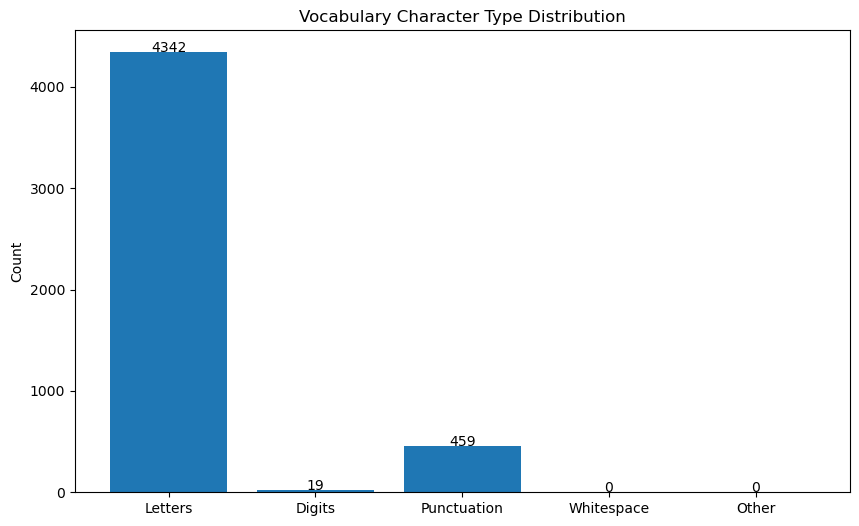

In [3]:
# Analyze the vocabulary
import matplotlib.pyplot as plt
import numpy as np

# Read the vocabulary file
with open(vocab_file, 'r', encoding='utf-8') as f:
    vocab_chars = [line.strip() for line in f if line.strip()]

# Count character types
letter_count = sum(1 for c in vocab_chars if c.isalpha())
digit_count = sum(1 for c in vocab_chars if c.isdigit())
punctuation_count = sum(1 for c in vocab_chars if not c.isalnum() and not c.isspace())
whitespace_count = sum(1 for c in vocab_chars if c.isspace())
other_count = len(vocab_chars) - letter_count - digit_count - punctuation_count - whitespace_count

# Display character type distribution
char_types = ['Letters', 'Digits', 'Punctuation', 'Whitespace', 'Other']
counts = [letter_count, digit_count, punctuation_count, whitespace_count, other_count]

plt.figure(figsize=(10, 6))
plt.bar(char_types, counts)
plt.title('Vocabulary Character Type Distribution')
plt.ylabel('Count')
for i, count in enumerate(counts):
    plt.text(i, count + 0.5, str(count), ha='center')
plt.show()